Data Preview:
   Order Date      Product Name     Category   Sales  Quantity
0  2023-01-05      Laptop Stand  Accessories  120.50         2
1  2023-02-12      Office Chair    Furniture  250.00         1
2  2023-02-20  Noise Cancelling  Electronics   99.99         1
3  2023-03-10         Desk Lamp  Accessories   45.75         3
4  2023-04-15        Smartphone  Electronics  499.99         1

Missing values per column:
Order Date      0
Product Name    0
Category        0
Sales           0
Quantity        0
dtype: int64

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    10 non-null     datetime64[ns]
 1   Product Name  10 non-null     object        
 2   Category      10 non-null     object        
 3   Sales         10 non-null     float64       
 4   Quantity      10 non-null     int64         
dtypes

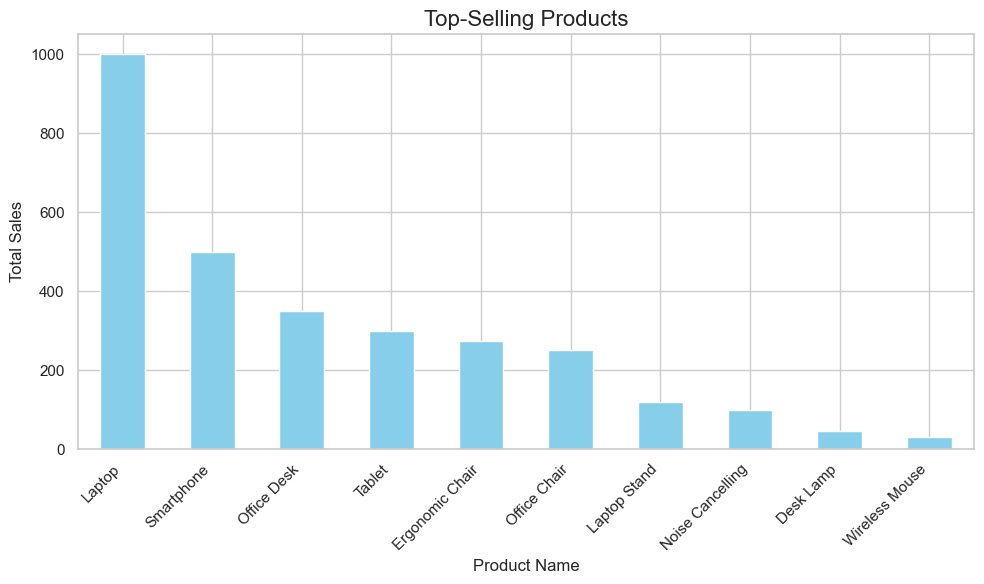

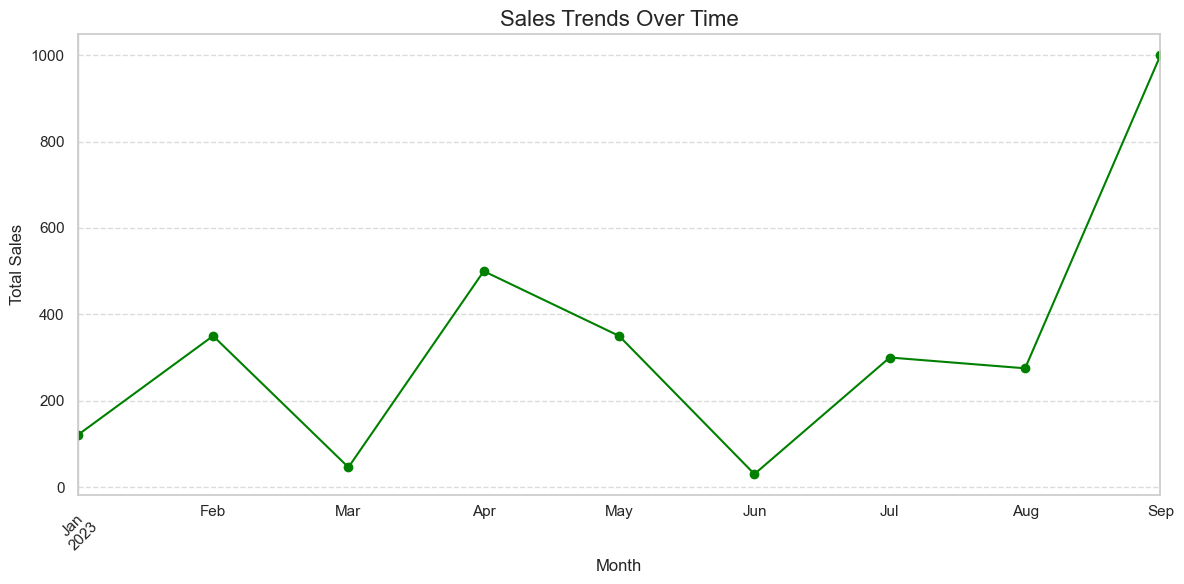

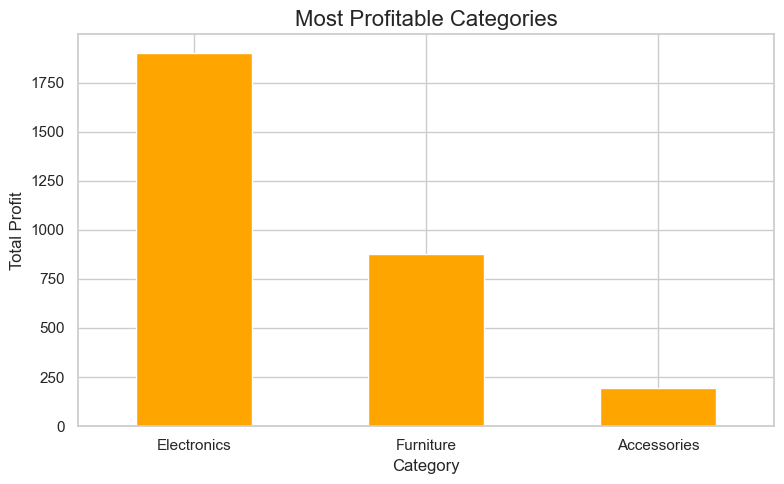

In [3]:
# E-Commerce Sales Analysis

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual style
sns.set_theme(style="whitegrid")

# Step 2: Load the Dataset
file_path = "ecommerce_sales.csv"  # Ensure the file exists in your working directory
# Ensure the file exists in your working directory
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
else:
    raise FileNotFoundError(f"The file {file_path} does not exist in the current directory.")

# Preview the data
print("Data Preview:")
print(data.head())

# Step 3: Clean the Data
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Ensure numerical columns are of correct types
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

# Display cleaned data info
print("\nCleaned Data Info:")
print(data.info())

# Step 4: Analyze Top-Selling Products
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top-selling products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top-Selling Products", fontsize=16)
plt.ylabel("Total Sales", fontsize=12)
plt.xlabel("Product Name", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 5: Visualize Sales Trends Over Time
# Extract year and month for aggregation
data['YearMonth'] = data['Order Date'].dt.to_period('M')

# Aggregate sales by month
monthly_sales = data.groupby('YearMonth')['Sales'].sum()

# Plot sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Sales Trends Over Time", fontsize=16)
plt.ylabel("Total Sales", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 6: Find the Most Profitable Categories
category_profit = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot profitable categories
plt.figure(figsize=(8, 5))
category_profit.plot(kind='bar', color='orange')
plt.title("Most Profitable Categories", fontsize=16)
plt.ylabel("Total Profit", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

